# Titanic: Machine Learning from Disaster

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.



## Goal

In this notebook, I will find insights from the data by using **pandas** to analyze and manipulate the data and **matplotlib** and **seaborn** for data visualization. I will apply a logistic regression model to predict which passengers are more likely to survive in a separate test set. 

In [2]:
# importing libraries
import os
import io
import warnings

import numpy as np
import scipy as sp
import pandas as pd
import sklearn as sk

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# load data
titanic = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/titanic_train.csv')
display(titanic.head())



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Description of the data set
Here's a brief description of each column in the data.

- PassengerID: A column added by Kaggle to identify each row and make submissions easier
- Survived: Whether the passenger survived or not and the value we are predicting (0=No, 1=Yes)
- Pclass: The class of the ticket the passenger purchased (1=1st, 2=2nd, 3=3rd)
- Sex: The passenger's sex
- Age: The passenger's age in years
- SibSp: The number of siblings or spouses the passenger had aboard the Titanic
- Parch: The number of parents or children the passenger had aboard the Titanic
- Ticket: The passenger's ticket number
- Fare: The fare the passenger paid
- Cabin: The passenger's cabin number
- Embarked: The port where the passenger embarked (C=Cherbourg, Q=Queenstown, S=Southampton)

In [4]:
titanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Pain, Dr. Alfred",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### **1: Find the number of missing values for each column.**
The first step in data analysis is to identify columns with missing data. Can you find the columns in this data with missing value as well as the number of records with missing value for each column?  

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


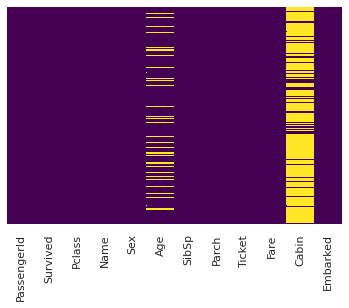

In [5]:
# TODO

print(titanic.isna().sum())
# titanic.columns

# nacount = { titanic.loc[0,x]:count(titanic.loc[:,x].isna()) for x in titanic.columns }

# nacount

# heatmap
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')


### **2: Impute missing values.**
Now we've identified the following columns with missing values: _Age_, _Cabin_ and _Embarked_. As the next step, we want to impute those missing values. There are three ways to impute the missing values:
- A constant value that has meaning within the domain.
- The mean, median or mode value based on non-missing values of that column.
- A random value drawn from other non-missing values of that column.

I will impute the missing values as follows:
- the missing values of column _age_ with the mean of that column.
- the missing values of column _Cabin_ with a constant value 'other'.
- the missing values of column _Embarked_ with the [mode](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mode.html) of that column.

In [6]:
# TODO

# Age

titanic['Age'].isna().sum()
mean = titanic['Age'].mean()
mean
titanic['Age'].fillna(mean, inplace = True)
titanic['Age'].isna().sum()


# Cabin
titanic['Cabin'].isna().sum()
titanic['Cabin'].fillna("other", inplace = True)
titanic['Cabin'].isna().sum()



# Embarked
titanic['Embarked'].isna().sum()

mode = titanic.mode()['Embarked'][0]
titanic['Embarked'].fillna(value = mode,inplace=True)

titanic['Embarked'].isna().sum()




0

### **3: Find the name of the person who has the 16th most expensive ticket**

In [7]:
# TODO

titanic.sort_values('Fare',ascending=False)['Name'].iloc[15]

'Farthing, Mr. John'

### **4: Out of all the females who survived, what's the name who has the 6th most expensive ticket?**

In [8]:
# TODO
titanic[(titanic['Sex']=="female") & (titanic['Survived']==1) ].sort_values('Fare',ascending=False)['Name'].iloc[5]
# titanic[(titanic['Sex']=="female") ].sort_values('Fare',ascending=False)['Name'].iloc[5]

'Baxter, Mrs. James (Helene DeLaudeniere Chaput)'

### **5: Examine the survival rate**
Calculate the survival rate for different gender and Pclass combination and use a couple of sentences to describe your findings. Hint: pivot_table is your friend.

In [9]:
# TODO
pvtbl = titanic.pivot_table('Survived', index='Sex', columns='Pclass', aggfunc='mean' ,margins=True, margins_name="Total")
print(pvtbl)


# Pivot Table Unstack

# print(pvtbl.unstack(level=0))

# Females survived at 74% as against 18% for men.
# 62% of class 1 passengers survived, 47% of class 2 and a mere 24% of the 3rd class
# males in the 2nd and 3rd classes were especially hard hit


Pclass         1         2         3     Total
Sex                                           
female  0.968085  0.921053  0.500000  0.742038
male    0.368852  0.157407  0.135447  0.188908
Total   0.629630  0.472826  0.242363  0.383838


### **6: Is Age or Fare an important factor to one's chance of survival?**
Visualize the distribution of Column _Age_ for both survived and non-survived population and write down your findings based on the visualization.






1.   Highest Percentage of Pclass 3 did not Survive
2.   Age is a significant factor, children have higher survival rate.
3.   Sex is a significant factor, women have higher survival rate.


Text(0.5, 1.0, 'Fare Class Distribution')

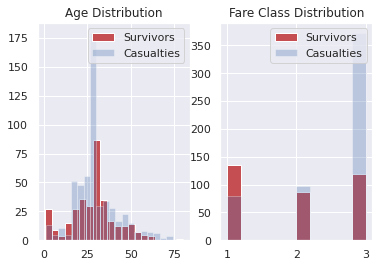

In [93]:
# TODO

sns.set()
# plt.plot(titanic[titanic['Survived']==1]['Age'])

# Age vs Survival

plt.subplot(1,2,1)
plt.hist(titanic[titanic['Survived']==1]['Age'], bins=20, color='r')
plt.hist(titanic[titanic['Survived']==0]['Age'], bins=20, alpha=0.3, color='b')
plt.legend(["Survivors","Casualties"], loc='upper right', fancybox=True)
plt.title(label="Age Distribution")

# ptS = titanic.pivot_table('Survived', index='Age')
# ptD = titanic.pivot_table('Survived', index='Age')
# pt.plot(kind='line')

# Fare Class vs Survival

plt.subplot(1,2,2)
plt.hist(titanic[titanic['Survived']==1]['Pclass'], bins=10, color='r')
plt.hist(titanic[titanic['Survived']==0]['Pclass'], bins=10, alpha=0.3, color='b')
plt.legend(["Survivors","Casualties"], loc='upper right', fancybox=True)
plt.title(label="Fare Class Distribution")



Text(0.5, 1.0, 'Sex Distribution')

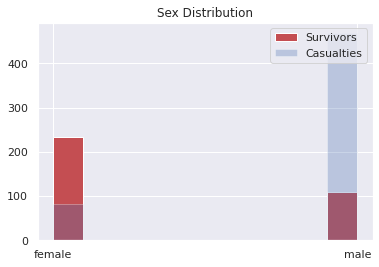

In [11]:
plt.hist(titanic[titanic['Survived']==1]['Sex'], bins=10, color='r')
plt.hist(titanic[titanic['Survived']==0]['Sex'], bins=10, alpha=0.3, color='b')
plt.legend(["Survivors","Casualties"], loc='upper right', fancybox=True)
plt.title(label="Sex Distribution")


### **Question 7: Calculate and visualize the survival rate for discrete columns**
- Calculate the survival rate for column _SibSp_ and _Parch_.
- Use sns.barplot to visualize the survival rate for column _SibSp_ and _Parch_.

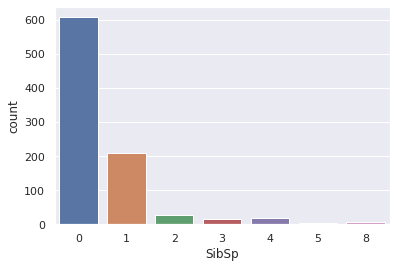

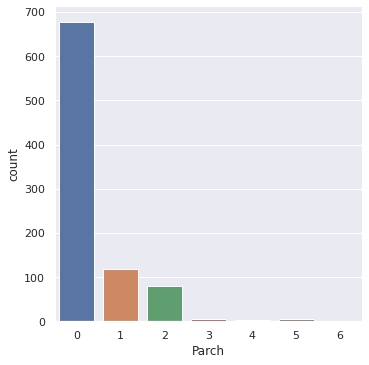

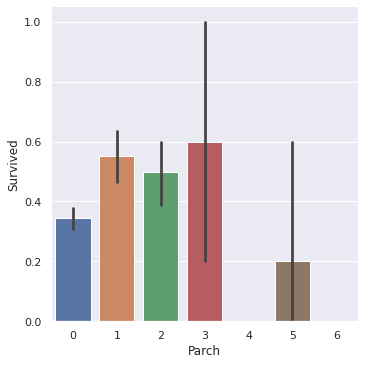

In [12]:
# TODO


# SibSp: The number of siblings or spouses the passenger had aboard the Titanic
# Parch: The number of parents or children the passenger had aboard the Titanic

titanic.pivot_table('Survived', index='SibSp', columns='Parch', margins_name="total", margins=True )

# titanic.pivot_table('Survived', index=['SibSp','Parch'], columns='Parch' margins=False )
# print(p)
# plt.subplot(1,2,1)
# p.plot(kind='bar')

# pivot_table(titanic,)

# titanic.pivot_table('Survived', index='Parch', margins=False )
# # print(p)
# plt.subplot(1,2,2)
# p.plot(kind='bar')

# distribution of SibSp
sns.countplot(x='SibSp',data=titanic)


# sns.barplot(x='SibSp', y='Survived', data=titanic)
g = sns.catplot(x='SibSp', y='Survived', data=titanic, kind='bar')
print(g)
# g.set_xticklabels(step=5)


sns.countplot(x='Parch',data=titanic)

g = sns.catplot(x='Parch', y='Survived', data=titanic, kind='bar')
print(g)







### **Question 8: Find the correlations.**
Find the correlations between the feature and the target variable _Survived_ and use heatmap to visualize it. Summarize your findings.

          Survived    Pclass       Sex       Age     SibSp     Parch
Survived  1.000000 -0.338481 -0.543351 -0.069809 -0.035322  0.081629
Pclass   -0.338481  1.000000  0.131900 -0.331339  0.083081  0.018443
Sex      -0.543351  0.131900  1.000000  0.084153 -0.114631 -0.245489
Age      -0.069809 -0.331339  0.084153  1.000000 -0.232625 -0.179191
SibSp    -0.035322  0.083081 -0.114631 -0.232625  1.000000  0.414838
Parch     0.081629  0.018443 -0.245489 -0.179191  0.414838  1.000000


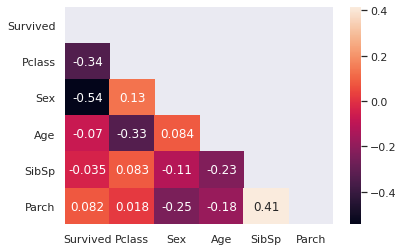

In [13]:
# TODO

titanic
heat= titanic.drop(['Embarked','PassengerId','Name','Fare','Ticket',	'Cabin'], axis = 1)

# impute categorical variables to integers
heat['Sex'].replace(to_replace='male', value=1, inplace=True)
heat['Sex'].replace(to_replace='female', value=0, inplace=True)


# heat['Embarked'].replace(to_replace='S', value=1, inplace=True)
# heat['Embarked'].replace(to_replace='Q', value=2, inplace=True)
# heat['Embarked'].replace(to_replace='C', value=3, inplace=True)


# heat['Pclass'].replace(to_replace=1, value=10, inplace=True)
# heat['Pclass'].replace(to_replace=2, value=5, inplace=True)
# heat['Pclass'].replace(to_replace=3, value=2, inplace=True)



# 
# print(heat.corr())


masked = np.triu(np.ones_like(heat.corr(), dtype=np.bool))

print(heat.corr())


sns.heatmap(heat.corr(),  mask=masked, annot=heat.corr())
plt.show()

# Sex and Survival had a negative correlation, i.e. men were less likely to survive
# Passenger Class and Survival had a negative correlation, i.e. numerically lower class was more likely to survive 
# As expected Parch and SibSp are strongly correlated


### **Question 9: Any other insights do you draw by analyzing the data? Summarize the findings as well as provide the code leading you to the findings.**

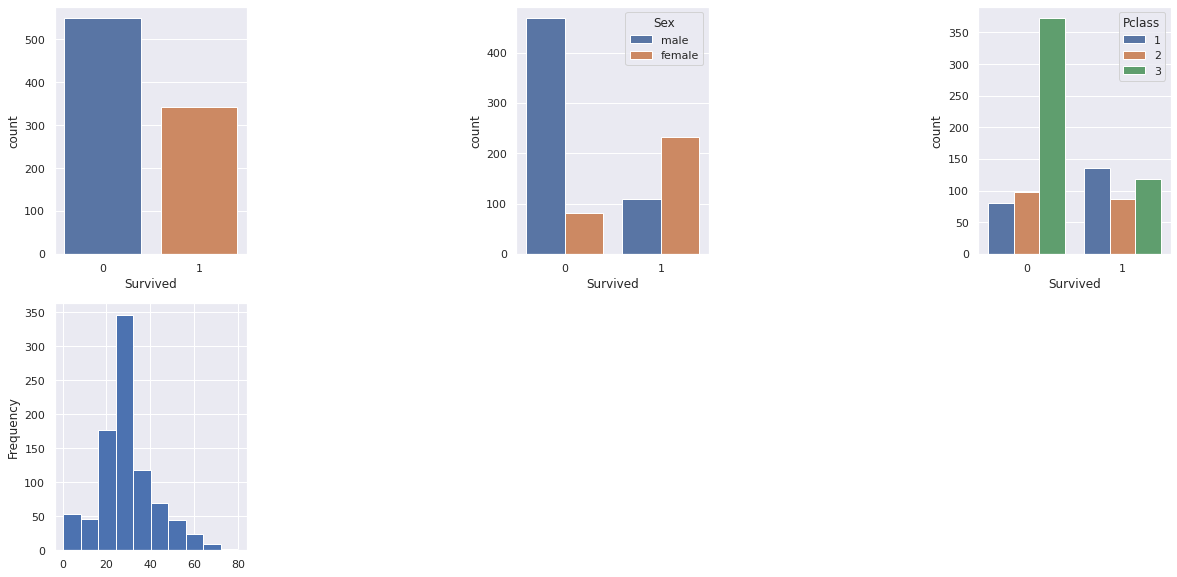

In [14]:
# TODO


plt.figure(figsize=(20,10))

# Other exploratory analysis
# visualize survival 

plt.subplot(2,5,1)
sns.countplot(x='Survived',data=titanic)

plt.subplot(2,5,3)
sns.countplot(x='Survived',data=titanic, hue='Sex')


plt.subplot(2,5,5)
sns.countplot(x='Survived',data=titanic, hue='Pclass')


plt.subplot(2,5,6)
# sns.distplot(titanic['Age'],kde=False,bins=10,color="B")
titanic['Age'].plot.hist(bins=10)

# titanic.isna().sum()



# sns.pairplot(heat, hue='Survived')
# plt.show()







### **Bonus Point: Build a ML model to predict survival.**
Can you build a logistic regression model to predict the probability of survival for all the passengers in this [file](https://raw.githubusercontent.com/zariable/data/master/titanic_test.csv)? You can evaluate your model accuracy on [Kaggle](https://www.kaggle.com/c/titanic). Can you think of any other ways to improve the model performance? Implement your idea to see if it actually works. 

Tried the following:

1: Simple Logistic Regression (CART) - Accuracy-> 76.55% 


2: Random Forest - Accuracy-> 76.076% 


3: Gradient Boosting Algorithm - Accuracy-> 78.46% 

In [92]:
# TODO

# evaluation metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# grid search for model selection
from sklearn.model_selection import GridSearchCV

# linear regression
from sklearn.linear_model import LinearRegression

# logistic regression
from sklearn.linear_model import LogisticRegression

# decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

#gradientBoost
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

# RandomForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

import random

warnings.simplefilter(action='ignore', category=FutureWarning)
random.seed(101)


# # load data
# titanic_new = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/titanic_train.csv')

# display(titanic.head())


train= titanic.drop(['PassengerId','Name','Ticket', 'Cabin'], axis = 1)

# replace sex with 1,0
train['Sex'].replace(to_replace='male', value=1, inplace=True)
train['Sex'].replace(to_replace='female', value=0, inplace=True)


# 'Embarked'
embark = pd.get_dummies(train['Embarked'], drop_first= True)

train = pd.concat([train,embark],axis=1)

train.drop(['Embarked'], axis=1,  inplace= True)


train.head()




# Finalize training set
train_x = train.drop(['Survived'], axis=1)
train_y = train['Survived']


# print(y)


# train
#initialize model
logmod = LogisticRegression()

#fit training data
logmod.fit(train_x,train_y)




# import test file
test = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/titanic_test.csv')


###########################################################

# clean data impute missing values
# print(test.isna().sum())



# 20% of age data is missing in test, replace with mean 
# test['Age'].fillna(mean, inplace = True)
# test.isna().sum()/len(test)

test['Age'].fillna(mean, inplace = True)


test['Fare'].fillna(mean, inplace = True)


test['Sex'].replace(to_replace='male', value=1, inplace=True)
test['Sex'].replace(to_replace='female', value=0, inplace=True)




pid = test['PassengerId']
# print(pid.head())

test = test.drop(['PassengerId','Name','Ticket'], axis = 1)


embark_test = pd.get_dummies(test['Embarked'], drop_first=True)

test = pd.concat([test,embark_test], axis=1)

test.drop(['Embarked','Cabin'], axis=1, inplace=True)


################################################################


# print(train_x.head())
# print(test.head())



# Use 


pred_log_reg = logmod.predict(test)

pred_log_reg = pd.DataFrame(pred_log_reg )
pred_log_reg .rename(columns={0: "Survived"}, inplace=True)
# print(pred_log_reg .head())
pred_log_reg ['PassengerId'] = pid
pred_log_reg  = pred_log_reg [["PassengerId","Survived"]]
# print(pred_log_reg.head())


# from google.colab import files

# pred_log_reg.to_csv("titanic_submission_log_reg.csv")

# files.download("titanic_submission_log_reg.csv")




# Random Forest classifier using grid search with cross-validation (GridSearchCV)



parameters = {
    "max_depth":[2,4,8],
    "min_samples_split":[0.05,0.1,0.2],
    "n_estimators":[5,10,20]
}
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, parameters, cv=3)
rfc_grid.fit(train_x,train_y)



pred_rand_for = rfc_grid.predict(test)

pred_rand_for = pd.DataFrame(pred_rand_for )
pred_rand_for.rename(columns={0: "Survived"}, inplace=True)
# print(pred_log_reg .head())
pred_rand_for['PassengerId'] = pid
pred_rand_for = pred_rand_for[["PassengerId","Survived"]]
# print(pred_log_reg.head())


# summarize the results of the grid search
print("The best score is {}".format(rfc_grid.best_score_))
print("The best hyper parameter setting is {}".format(rfc_grid.best_params_))




# from google.colab import files

# pred_rand_for.to_csv("titanic_submission_rand_for.csv")

# files.download("titanic_submission_rand_for.csv")








# Train Gradient Boosted Tree Model

parameters={
    "learning_rate":[.01,.1,1],
    "n_estimators":[50,100,200],
    "max_depth":[2,4],
    "min_samples_split":[0.05, 0.1]
}



gbc = GradientBoostingClassifier(random_state=0)
gbc_grid = GridSearchCV(gbc, parameters, cv = 3)
gbc_grid.fit(train_x,train_y)

pred_gradient_boost = gbc_grid.predict(test)
pred_gradient_boost = pd.DataFrame(pred_gradient_boost)
pred_gradient_boost.rename(columns={0: "Survived"}, inplace=True)
# print(pred_gradient_boost.head())
pred_gradient_boost['PassengerId'] = pid
pred_gradient_boost = pred_gradient_boost[["PassengerId","Survived"]]
# print(pred_gradient_boost)


from google.colab import files

pred_gradient_boost.to_csv("titanic_submission_gbc.csv")

files.download("titanic_submission_gbc.csv")


# summarize the results of the grid search
print("The best score is {}".format(gbc_grid.best_score_))
print("The best hyper parameter setting is {}".format(gbc_grid.best_params_))




/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


The best score is 0.809203142536476
The best hyper parameter setting is {'max_depth': 8, 'min_samples_split': 0.05, 'n_estimators': 20}


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The best score is 0.819304152637486
The best hyper parameter setting is {'learning_rate': 0.01, 'max_depth': 4, 'min_samples_split': 0.05, 'n_estimators': 200}
